In [1]:
from tensorflow import keras
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator
from keras.api.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.api.models import Sequential

# Paths to dataset directories
train_dir = './dataset/train'
test_dir = './dataset/test'

# Image dimensions
img_height, img_width = 48, 48
batch_size = 64
num_classes = 7

# Data Augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2  # Split 20% of training data for validation
)

# Data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu',
           input_shape=(img_height, img_width, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
# model.summary()

# # Train the model
# history = model.fit(
#     train_generator,
#     validation_data=val_generator,
#     epochs=50,
#     verbose=1
# )

# # Evaluate the model on the test set
# test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
# print(f"Test Accuracy: {test_accuracy:.2f}")

# # Save the model
# model.save('emotion_detection_cnn.h5')

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


c:\Users\SHAURYAM DUBEY\Documents\.repo-github\csnn\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


c:\Users\SHAURYAM DUBEY\Documents\.repo-github\csnn\venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


113/113 ━━━━━━━━━━━━━━━━━━━━ 55s 484ms/step


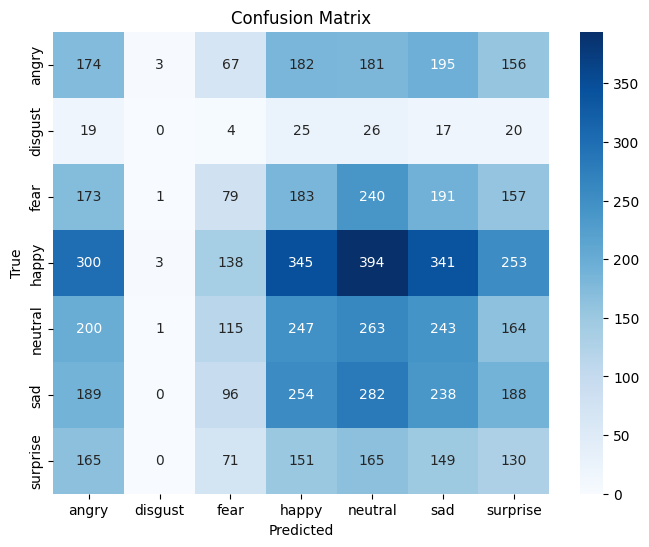

Classification Report:
              precision    recall  f1-score   support

       angry       0.14      0.18      0.16       958
     disgust       0.00      0.00      0.00       111
        fear       0.14      0.08      0.10      1024
       happy       0.25      0.19      0.22      1774
     neutral       0.17      0.21      0.19      1233
         sad       0.17      0.19      0.18      1247
    surprise       0.12      0.16      0.14       831

    accuracy                           0.17      7178
   macro avg       0.14      0.14      0.14      7178
weighted avg       0.17      0.17      0.17      7178



In [2]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict labels for the test set
model.load_weights('emotion_detection_cnn.h5')
y_pred = model.predict(test_generator, verbose=1)
# Convert predictions to class indices
y_pred_classes = np.argmax(y_pred, axis=1)

# True labels
y_true = test_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Display confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report for detailed metrics
print("Classification Report:")
print(classification_report(y_true, y_pred_classes,
      target_names=test_generator.class_indices.keys()))